This notebook follows https://github.com/khanhnamle1994/movielens?tab=readme-ov-file

In [32]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data from https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [33]:
DATASET_DIR = 'ml-latest-small'
df = pd.read_csv(os.path.join(DATASET_DIR, 'links.csv'))
print(df.isnull().sum())
df.head()

movieId    0
imdbId     0
tmdbId     8
dtype: int64


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [34]:
movies_df = pd.read_csv(os.path.join(DATASET_DIR, 'movies.csv'))
print(movies_df.isnull().sum())
movies_df.head()

movieId    0
title      0
genres     0
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
ratings_df = pd.read_csv(os.path.join(DATASET_DIR, 'ratings.csv'))
print(ratings_df.isnull().sum())
print(ratings_df.columns)
ratings_df.head()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
tags_df = pd.read_csv(os.path.join(DATASET_DIR, 'tags.csv'))
print(tags_df.isnull().sum())
print(tags_df.columns)
tags_df.head()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [37]:
tags_df.groupby(['userId', 'movieId', 'tag']).count()

timestamp
userId movieId tag                        
2      60756   Highly quotable           1
               funny                     1
               will ferrell              1
       89774   Boxing story              1
               MMA                       1
...                                    ...
606    7382    for katie                 1
       7936    austere                   1
610    3265    gun fu                    1
               heroic bloodshed          1
       168248  Heroic Bloodshed          1

[3683 rows x 1 columns]

In [38]:
joined_df = (ratings_df
             .set_index('movieId')
             .join(tags_df.set_index('movieId'), lsuffix='_r', rsuffix='_t')
             .join(movies_df.set_index('movieId'))
            )

joined_df.head()

# joined_df.groupby(['userId_r', 'movieId'])['rating'].aggregate()


,userId_r,rating,timestamp_r,userId_t,tag,timestamp_t,title,genres
movieId,,,,,,,,
1,1,4.0,964982703,336.0,pixar,1.139046e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,964982703,474.0,pixar,1.137207e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,964982703,567.0,fun,1.525286e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,4.0,964981247,289.0,moldy,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance
3,1,4.0,964981247,289.0,old,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance


Use wordcloud to see which are the most popular titles. 

(-0.5, 5999.5, 1999.5, -0.5)

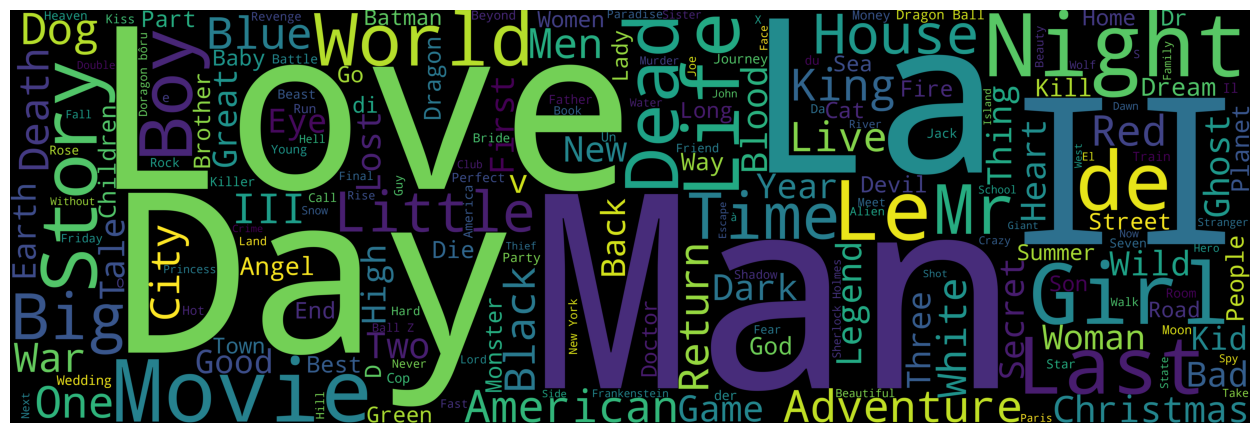

In [39]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
movies_df['title'] = movies_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=6000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')

In [40]:
ratings_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

The distplot shows the distibution of the movie ratings.

/tmp/ipykernel_19418/955986682.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df['rating'].fillna(ratings_df['rating'].mean()))


<Axes: xlabel='rating', ylabel='Density'>

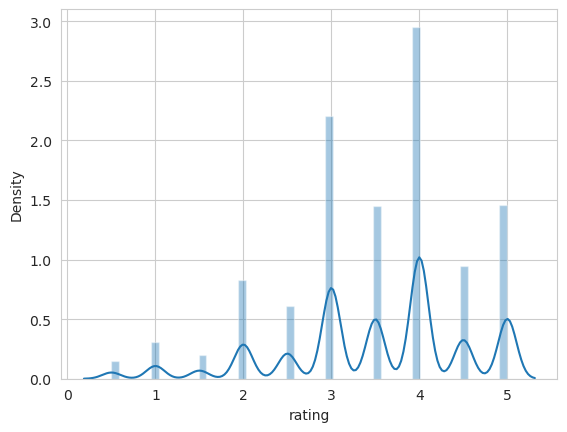

In [41]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
sns.distplot(ratings_df['rating'].fillna(ratings_df['rating'].mean()))

Show the top rated movies. Although the top rated movies have 5 stars, it also shows that most of them have very few ratings.

In [65]:
joined_df.groupby(['title'])['rating'].aggregate(['mean', 'count']).sort_values(by=['mean', 'count'], ascending=False).head(20)

,mean,count
title,,
Come and See (Idi i smotri) (1985),5.0,10
More (1998),5.0,7
Who Killed Chea Vichea? (2010),5.0,5
Belle époque (1992),5.0,2
Enter the Void (2009),5.0,2
Heidi Fleiss: Hollywood Madam (1995),5.0,2
Into the Woods (1991),5.0,2
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976),5.0,2
Lamerica (1994),5.0,2


Which genres are the most popular.

In [43]:
genre_labels = set()
for s in joined_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

keyword_count = dict()
for genre in genre_labels:
    keyword_count[genre] = 0

for s in joined_df['genres'].str.split('|').values:
    for g_label in s:
        keyword_count[g_label] += 1 

sorted(keyword_count.items(), key=lambda x: x[1], reverse=True)[:5]


[('Drama', 167783),
 ('Thriller', 130834),
 ('Comedy', 119180),
 ('Crime', 110712),
 ('Action', 86976)]

# Content based filtering

In [44]:
movies_df['genres'] = movies_df['genres'].str.split('|').values
movies_df['genres'] = movies_df['genres'].fillna("").astype('str')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy..."
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']"
4,5,Father of the Bride Part II (1995),['Comedy']


Compare the similarity of each movie using the genres. However, we must turn the genres into vectors first using tfidf. 

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,2), min_df=0.0)
tfidf_matrix = tf.fit_transform(movies_df['genres'])
tfidf_matrix.shape

(9742, 177)

After the genres have been vectorized. Similarity is computed using cosine.

In [46]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(9742, 9742)

Get the top 20 most similar movies to a given title using the consine_sim similarity matrix.

In [47]:
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

def generate_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# indices

In [66]:
generate_recommendations('Good Will Hunting (1997)').head(20)

24                            Leaving Las Vegas (1995)
27                                   Persuasion (1995)
42                How to Make an American Quilt (1995)
45                        When Night Is Falling (1995)
66                                 Bed of Roses (1996)
75     Once Upon a Time... When We Were Colored (1995)
76                           Angels and Insects (1995)
93               Bridges of Madison County, The (1995)
115                       Up Close and Personal (1996)
151                                    Mad Love (1995)
162                         Scarlet Letter, The (1995)
170                               Total Eclipse (1995)
175                       Walk in the Clouds, A (1995)
183                              Before Sunrise (1995)
189                           Circle of Friends (1995)
213                            Immortal Beloved (1994)
232                                 Love Affair (1994)
261                  Picture Bride (Bijo photo) (1994)
262       

In [67]:
generate_recommendations('Toy Story (1995)').head(20)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
5490    Twelve Tasks of Asterix, The (Les douze travau...
6448           TMNT (Teenage Mutant Ninja Turtles) (2007)
8357                                The Lego Movie (2014)
3194                                         Shrek (2001)
7530                               Gnomeo & Juliet (2011)
7805        Pu

In [68]:
generate_recommendations('Saving Private Ryan (1998)').head(20)

909                           Apocalypse Now (1979)
933                    Boot, Das (Boat, The) (1981)
1407          All Quiet on the Western Front (1930)
1503                     Saving Private Ryan (1998)
1826                      Thin Red Line, The (1998)
2216                        Dirty Dozen, The (1967)
2310                        Longest Day, The (1962)
2313                       Tora! Tora! Tora! (1970)
2573                                Red Dawn (1984)
2631                  Force 10 from Navarone (1978)
2716                   Fighting Seabees, The (1944)
2808                            Patriot, The (2000)
3610                      Behind Enemy Lines (2001)
3646                         Black Hawk Down (2001)
3724                        We Were Soldiers (2002)
3856                             Windtalkers (2002)
4114                                    Zulu (1964)
4121      Victory (a.k.a. Escape to Victory) (1981)
4243                       Gods and Generals (2003)
5009    Alex

Make a pydantic BaseModel for the api incoming payload.

In [51]:
from pydantic import BaseModel, ValidationError

class Payload(BaseModel):
    title: str
    
data = {
    'title': 'Saving Private Ryan (1998)'
}
payload = Payload(**data)
generate_recommendations(payload.title).values.astype('str')

array(['Apocalypse Now (1979)', 'Boot, Das (Boat, The) (1981)',
       'All Quiet on the Western Front (1930)',
       'Saving Private Ryan (1998)', 'Thin Red Line, The (1998)',
       'Dirty Dozen, The (1967)', 'Longest Day, The (1962)',
       'Tora! Tora! Tora! (1970)', 'Red Dawn (1984)',
       'Force 10 from Navarone (1978)', 'Fighting Seabees, The (1944)',
       'Patriot, The (2000)', 'Behind Enemy Lines (2001)',
       'Black Hawk Down (2001)', 'We Were Soldiers (2002)',
       'Windtalkers (2002)', 'Zulu (1964)',
       'Victory (a.k.a. Escape to Victory) (1981)',
       'Gods and Generals (2003)',
       'Alexander Nevsky (Aleksandr Nevskiy) (1938)'], dtype='<U43')

A simple flask api that returns the top 20 most similar movies given a title.

In [52]:
from flask import Flask, jsonify, request

app = Flask(__name__)


@app.route('/recommend', methods=['POST'])
def predict():
    try:
        payload = Payload(**request.json)
        recommendations = list(generate_recommendations(payload.title).values)
        response = {
            'recommendations': recommendations
        }
        return jsonify(response), 200
    except ValidationError as e:
        return jsonify(e.errors()), 400

# if __name__ == '__main__':
#     app.run()

# User-Based Rating Prediction
The assumption is that users that rated the same movies similarly are most likely going to enjoy the same movies. 
To predict a user's rating for a movie:
1. Identify other users who have rated the movie.
2. Calculate the Pearson correlation to assess the similarity between these users and the target user. We may need to mean center the ratings for each person to account for the fact that some users rate more generously than others.
3. Select the top 20 most similar users and use the average of their ratings as the predicted rating for the target user.

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ratings_pivoted_df = ratings_df.pivot(index='userId', columns='movieId', values='rating')

standard_ratings_df = pd.DataFrame(scaler.fit_transform(ratings_pivoted_df))
standard_ratings_df.columns = ratings_pivoted_df.columns
standard_ratings_df.index = ratings_pivoted_df.index

user_corr_df = standard_ratings_df.T.corr(method='pearson')
print(user_corr_df.shape)

user_corr_df.iloc[:4, :4]

(610, 610)


userId,1,2,3,4
userId,,,,
1,1.000000,1.0,0.029325,0.190844
2,1.000000,1.0,NaN,NaN
3,0.029325,NaN,1.000000,NaN
4,0.190844,NaN,NaN,1.000000


In [204]:
def predict_rating(user: str, item: str) -> float:
    print(user, item)
    # check if rating is already available
    try: 
        print('rating already available')
        return ratings_pivoted_df.loc[user,item]
    except KeyError:
        pass
        
    # select the users that rated an item
    # from these users select the top 20 most similar to the target user
    similar_users_df = (ratings_pivoted_df[item]
                    .to_frame()
                    .dropna()
                    .join(user_corr_df, lsuffix='_l')
                    .loc[:, ['1_l', str(user)]]
                    .sort_values(by=str(user), ascending=False)
                    .iloc[:20,:]
                    )
    
    return similar_users_df[str(f'{item}_l')].mean()


item = ratings_pivoted_df.columns[0]
user = ratings_pivoted_df.index[0]
predict_rating(user, item)
# selected_users_df.columns

1 1
rating already available


4.0

In [205]:
def fill_ratings(rows):
    return [predict_rating(rows.name, row) for row in rows.index]
        
    
ratings_filed_df = ratings_pivoted_df.apply(fill_ratings, axis=1)
ratings_filed_df

1 Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585, 193587,
       193609],
      dtype='int64', name='movieId', length=9724)
rating already available
2 Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585, 193587,
       193609],
      dtype='int64', name='movieId', length=9724)
rating already available
3 Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585, 193587,
       193609],
      dtype='int64', name='movieId', length=9724)
rating already available
4 Index([     1,      2,      3,      4,      5,      6,      7,      8,      9,
           10,
       ...
       193565, 193567, 193571, 193573, 193579, 193581, 193583,

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
ratings_pivoted_df.loc[user, '']

KeyError: ''

# Collaborative Filtering Recommendation Model

In [53]:
ratings_df['userId'] = ratings_df['userId'].fillna(0)
ratings_df['movieId'] = ratings_df['movieId'].fillna(0)
ratings_df['rating'] = ratings_df['rating'].fillna(ratings_df['rating'].mean())

In [54]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [55]:
train_df, valid_df = train_test_split(ratings_df.sample(frac=0.02))

In [56]:
train_data_matrix = train_df[['userId', 'movieId', 'rating']].to_numpy()
valid_data_matrix = valid_df[['userId', 'movieId', 'rating']].to_numpy()
print(train_data_matrix.shape)
print(valid_data_matrix.shape)

(1512, 3)
(505, 3)


In [69]:
from sklearn.metrics.pairwise import pairwise_distances

user_correlation = 1 - pairwise_distances(train_df, metric='correlation')
print(user_correlation.shape)
user_correlation[:4, :4]

(1512, 1512)


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [58]:
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0 
print(item_correlation[:4, :4])

[[ 1.          0.00755776 -0.04493027]
 [ 0.00755776  1.          0.03847463]
 [-0.04493027  0.03847463  1.        ]]


In [59]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [61]:
user_prediction = predict(train_data_matrix, user_correlation, type='user')
print(f'User-based CF RMSE: {rmse(user_prediction, valid_data_matrix)}')

item_prediction = predict(train_data_matrix, item_correlation, type='item')
print(f'User-based CF RMSE: {rmse(item_prediction, valid_data_matrix)}')

print(valid_data_matrix)

User-based CF RMSE: 22523.844319968735
User-based CF RMSE: 28037.061497975916
[[2.400e+02 3.680e+02 5.000e+00]
 [3.680e+02 4.820e+02 4.000e+00]
 [2.210e+02 1.247e+03 4.500e+00]
 ...
 [2.070e+02 2.991e+03 4.000e+00]
 [2.300e+02 6.863e+03 3.000e+00]
 [4.380e+02 5.881e+03 3.000e+00]]


rmse on train data

In [62]:
print(f'User-based CF RMSE: {rmse(user_prediction, train_data_matrix)}')
print(f'User-based CF RMSE: {rmse(item_prediction, train_data_matrix)}')

User-based CF RMSE: 16525.780492579634
User-based CF RMSE: 1314.5619145974424
